In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from joblib import dump, load

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
df = pd.read_csv("Advertising.csv")
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
df.shape

(200, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


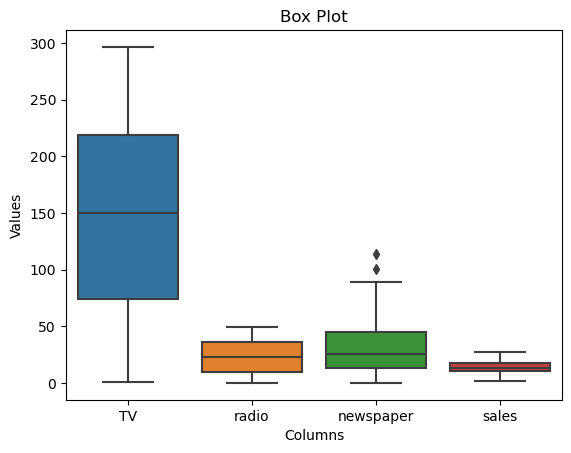

In [7]:
# Reshaping the DataFrame
df_melted = df.melt(var_name='Columns', value_name='Values')

# Create a box plot
sns.boxplot(x='Columns', y='Values', data=df_melted)

# Add title
plt.title('Box Plot')

# Show plot
plt.show()

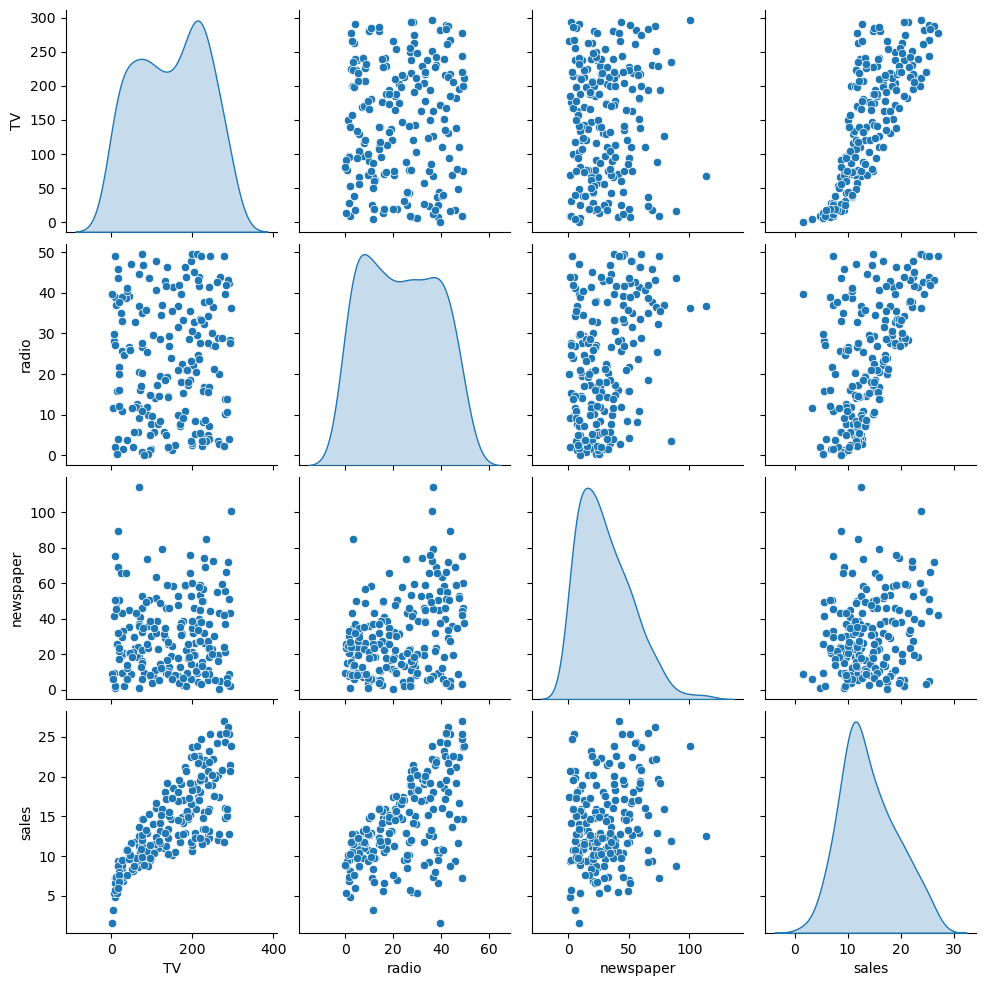

In [8]:
sns.pairplot(df, diag_kind='kde')
# Show plot
plt.show()

### Separate the Features & Target variables

In [9]:
X = df.drop("sales", axis = 1)
y = df['sales']

In [10]:
help(LinearRegression)

Help on class LinearRegression in module sklearn.linear_model._base:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(*, fit_intercept=True, normalize='deprecated', copy_X=True, n_jobs=None, positive=False)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |  
 |  normalize : bool, default=False
 |      This parameter is ignored when ``fit_intercept`` is set to False.
 |      If True, the regressors X will be normalized before regression by
 |    

### Split into Train & Test

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

### Instaniate the Linear Regression Model

In [12]:
lr = LinearRegression()

### Fit the Model

In [13]:
lr.fit(X_train, y_train)

LinearRegression()

### Predict with the fitted model

In [14]:
predictions = lr.predict(X_test)

In [15]:
predictions

array([16.5653963 , 21.18822792, 21.55107058, 10.88923816, 22.20231988,
       13.35556872, 21.19692502,  7.35028523, 13.27547079, 15.12449511,
        9.01443026,  6.52542825, 14.30205991,  8.97026042,  9.45679576,
       12.00454351,  8.91549403, 16.15619251, 10.29582883, 18.72473553,
       19.76821818, 13.77469028, 12.49638908, 21.53501762,  7.60860741,
        5.6119801 , 20.91759483, 11.80627665,  9.08076637,  8.51412012,
       12.17604891,  9.9691939 , 21.73008956, 12.77770578, 18.1011362 ,
       20.07590796, 14.26202556, 20.93826535, 10.83938827,  4.38190607,
        9.51332406, 12.40486324, 10.17045434,  8.09081363, 13.16388427,
        5.2243552 ,  9.28893833, 14.09330719,  8.69024497, 11.66119763,
       15.71848432, 11.63156862, 13.35360735, 11.1531472 ,  6.33636845,
        9.76157954,  9.4195714 , 24.25516546,  7.69519137, 12.15317572])

In [16]:
pred = pd.DataFrame(predictions, columns = ['Predictions'])
pred.head()

,Predictions
0,16.565396
1,21.188228
2,21.551071
3,10.889238
4,22.202320


In [17]:
type(y_test)

pandas.core.series.Series

In [18]:
pred['y_test'] = y_test.reset_index(drop=True)
pred.head()

,Predictions,y_test
0,16.565396,16.9
1,21.188228,22.4
2,21.551071,21.4
3,10.889238,7.3
4,22.202320,24.7


In [19]:
pred['Differences'] = pred.y_test - pred.Predictions  
pred.head()


,Predictions,y_test,Differences
0,16.565396,16.9,0.334604
1,21.188228,22.4,1.211772
2,21.551071,21.4,-0.151071
3,10.889238,7.3,-3.589238
4,22.202320,24.7,2.497680


In [20]:
pred['Diffsquared'] = pred.Differences ** 2
pred.head()

,Predictions,y_test,Differences,Diffsquared
0,16.565396,16.9,0.334604,0.111960
1,21.188228,22.4,1.211772,1.468392
2,21.551071,21.4,-0.151071,0.022822
3,10.889238,7.3,-3.589238,12.882631
4,22.202320,24.7,2.497680,6.238406


In [21]:
pred.Diffsquared.sum() 

227.80783420291314

In [22]:
pred.Diffsquared.sum() / (len(pred))

3.796797236715219

## Visualize the residuals - Is it normally distributed?

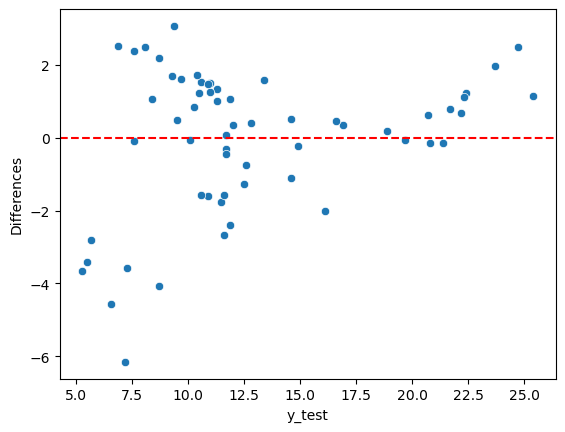

In [23]:
sns.scatterplot(x = pred.y_test, y= pred.Differences)
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

In [24]:
len(pred)

60

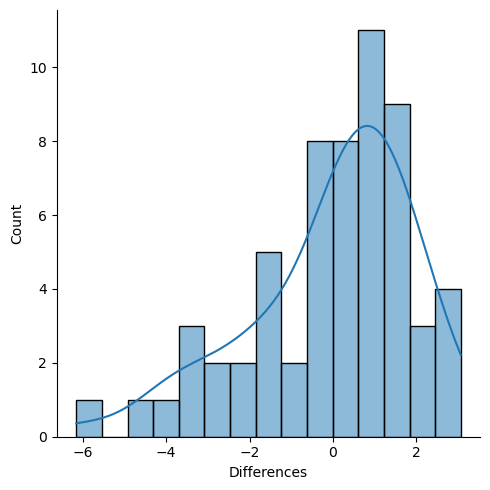

In [25]:
sns.displot(pred.Differences,bins=15,kde=True)
plt.show()

Still unsure if normality is a reasonable approximation? We can check against the [normal probability plot.](https://en.wikipedia.org/wiki/Normal_probability_plot)

In [26]:
import scipy as sp

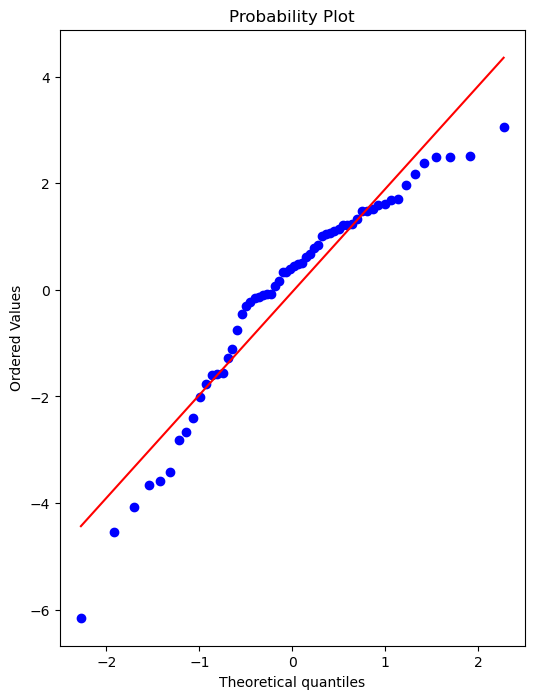

In [27]:
# Create a figure and axis to plot on
fig, ax = plt.subplots(figsize=(6,8),dpi=100)
# probplot returns the raw values if needed
# we just want to see the plot, so we assign these values to _
_ = sp.stats.probplot(pred.Differences,plot=ax)
plt.show()

### Understand our Target values

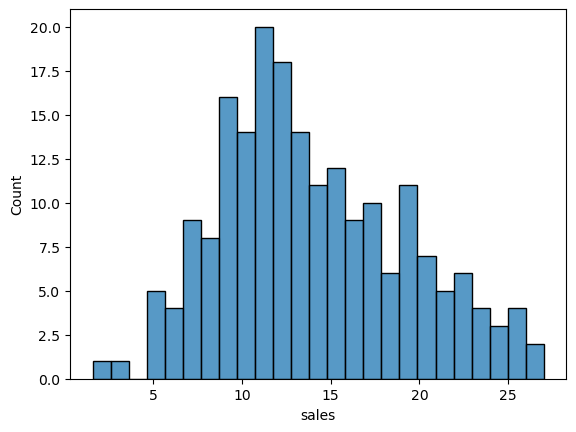

In [28]:
sns.histplot(data = df, x = 'sales', bins = 25 )
plt.show()

In [29]:
# Average Sales 
df.sales.mean()

14.022500000000003

# Calculating Error Metrics

### Mean Absolute Error

In [30]:
mae = mean_absolute_error(y_test, predictions)
mae

1.5116692224549086

### Mean Squared Error

In [31]:
mse = mean_squared_error(y_test, predictions)
mse

3.796797236715219

### Root Mean Squared Error

In [32]:
rmse = np.sqrt(mse)
rmse

1.9485372043446385

### R-squared

In [33]:
r2 = r2_score(y_test, predictions)
r2

0.8609466508230368

## Run the Linear Regression again with all the data

In [34]:
final_model = LinearRegression()

In [35]:
final_model.fit(X,y)

LinearRegression()

### Predict with a new set of data points using our final model

In [41]:
new_data = [[250, 19, 15]]

In [42]:
final_model.predict(new_data)

/Users/aayykayy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([17.94655866])

### Coefficients

In [39]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [40]:
coeff_df = pd.DataFrame(final_model.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
TV,0.045765
radio,0.188530
newspaper,-0.001037


#### Interpreting the coefficients:

####### TV Spending
- Holding all other features fixed, a 1 unit (A thousand dollars) increase in TV Spend is associated with an increase in sales of 0.045 "sales units", in this case 1000s of units .
This basically means that for every $1000 dollars spend on TV Ads, we could expect 45 more units sold.

####### Radio Spending
- Holding all other features fixed, a 1 unit (A thousand dollars) increase in Radio Spend is associated with an increase in sales of 0.188 "sales units", in this case 1000s of units .
This basically means that for every $1000 dollars spend on Radio Ads, we could expect 188 more units sold.

####### Newspaper Spending
- Holding all other features fixed, a 1 unit (A thousand dollars) increase in Newspaper Spend is associated with a decrease in sales of 0.001 "sales units", in this case 1000s of units .
This basically means that for every $1000 dollars spend on Newspaper Ads, we could actually expect to sell 1 less unit. Being so close to 0, this heavily implies that newspaper spend has no real effect on sales.

### Final Model Fit

See how our model is predicting on all the data we have

In [36]:
y_hat = final_model.predict(X)

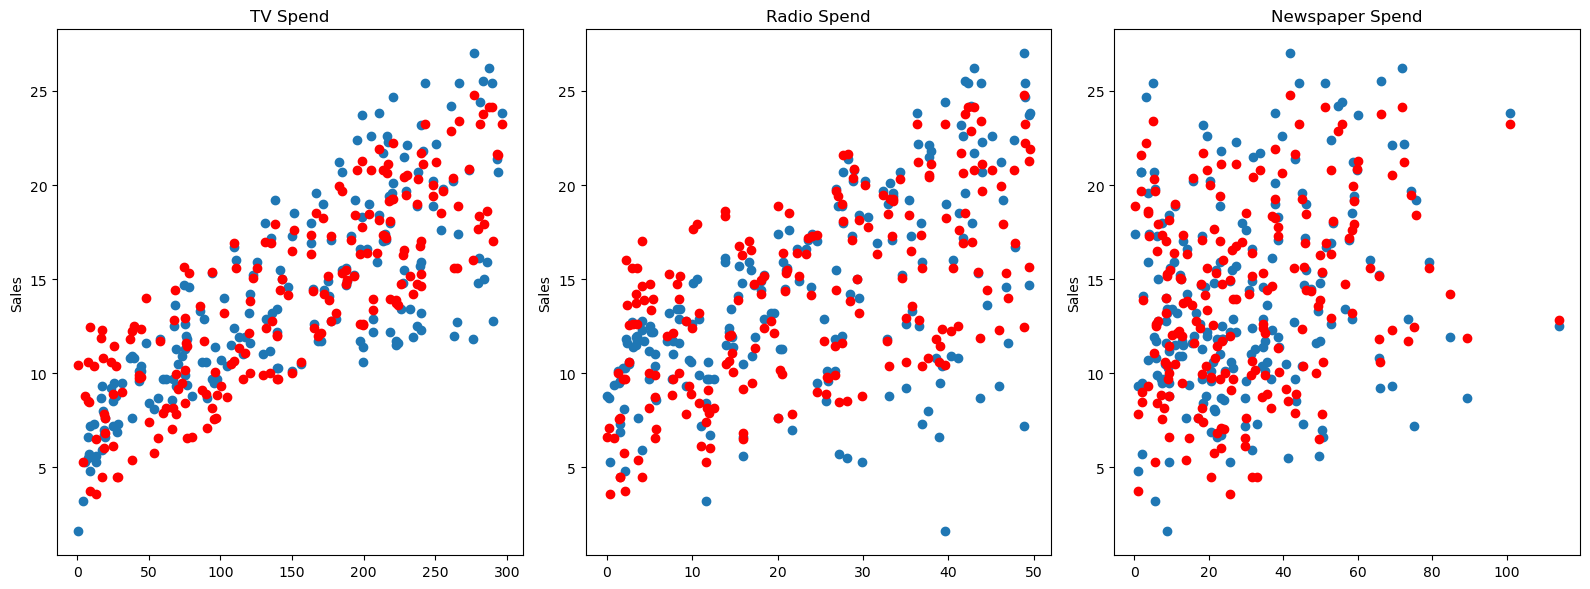

In [38]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].plot(df['TV'],y_hat,'o',color='red')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].plot(df['radio'],y_hat,'o',color='red')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].plot(df['newspaper'],y_hat,'o',color='red')
axes[2].set_title("Newspaper Spend");
axes[2].set_ylabel("Sales")
plt.tight_layout();

## Saving and loading the model to use for production

In [43]:
from joblib import dump, load

### Save the Model

In [44]:
dump(final_model, 'sales_final_model.joblib') 

['sales_final_model.joblib']

### Load the Model to use on new data

In [45]:
load_model = load('sales_final_model.joblib')

### Predict using the saved model

In [46]:
new_sample_data = [[115, 14, 25]]

In [47]:
load_model.predict(new_sample_data)

/Users/aayykayy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([10.81530651])